In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math

from src.graph import (
    graph_loader,
    spectral_bipartition_coloring
)

from src.seed import (seed_degree, 
    seed_polarized, 
    seed_random, 
    seed_polarized_centrality_mixed, 
    seed_polarized_centrality, 
    seed_polarized_degree, 
    seed_centrality_mixed, 
    seed_centrality, 
    seed_influence_maximization
)

from evaluation_fixed_seed import evaluate_all_seeds

In [2]:
import warnings

# Suppress the specific UserWarning from sklearn
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.manifold._spectral_embedding")

In [3]:
num_groups = 2


G = graph_loader('datasets/congress_network/congress.edgelist')

spectral_bipartition_coloring(G)

colors = plt.colormaps['tab10'].resampled(num_groups)   # Use 'tab10' colormap to get distinct colors
color_map = [colors(G.nodes[node]["color"]) for node in G.nodes()]
print(', '.join([f"Color {i+1}: {value}" for i, value in enumerate(list(Counter(color_map).values()))]))

Number of Nodes: 475
Number of Edges: 13289
Color 1: 284, Color 2: 191


In [4]:
seed_size = G.number_of_nodes() // 20
print(f"Seed size: {seed_size}")
max_iter = 1000

directory = 'results/test_twitter/'  # Adjust the path if needed

Seed size: 23


In [5]:
k_values = np.linspace(1, seed_size, 7, dtype=int)  #[1,5,10,15,20,25,30]

seed_functions = {
        "Random": seed_random(G, seed_size),
        "MIA": seed_influence_maximization(G, seed_size, 1000, 8, 0),
        "Degree": seed_degree(G, seed_size),
        "Centrality": seed_centrality(G, seed_size),
        "Centrality Mixed": seed_centrality_mixed(G, seed_size),
        "Polarized": seed_polarized(G, seed_size, 0),
        "Polarized Degree": seed_polarized_degree(G, seed_size, 0),
        "Polarized Centrality": seed_polarized_centrality(G, seed_size, 0),
        "Polarized Centrality Mixed": seed_polarized_centrality_mixed(G, seed_size, 0),
    }

for k in k_values:
    print(f"K: {k}")
    budget = 2 * k

    # Example of how to call the function
    all_results_df = evaluate_all_seeds(G, seed_functions, k, max_iter, budget, "netin_09_test", verbose=False)

    all_results_df.to_csv(f"{directory}results_congress_network_{k}_k_{budget}_budget.csv", index=False)

Selecting seeds: 100%|██████████| 23/23 [00:02<00:00, 10.99seed/s]


K: 1
Running evaluation for seed function: Random
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 989.78it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 7228.07it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 7759.94it/s]


Running evaluation for seed function: MIA
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 3042.01it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 8377.57it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 8237.35it/s]


Running evaluation for seed function: Degree
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 3110.48it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 7543.74it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 7903.61it/s]


Running evaluation for seed function: Centrality
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2968.17it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 7980.09it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 8168.56it/s]


Running evaluation for seed function: Centrality Mixed
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2981.01it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 7695.41it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 8036.52it/s]


Running evaluation for seed function: Polarized
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2929.46it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 8173.58it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 8249.39it/s]


Running evaluation for seed function: Polarized Degree
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2943.09it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 7946.74it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 8307.25it/s]


Running evaluation for seed function: Polarized Centrality
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 3040.16it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 8198.14it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 8261.74it/s]


Running evaluation for seed function: Polarized Centrality Mixed
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 3056.47it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 7881.32it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 8390.02it/s]


K: 4
Running evaluation for seed function: Random
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 3022.59it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 8389.56it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 7861.38it/s]


Running evaluation for seed function: MIA
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 3040.52it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 7181.41it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 4659.05it/s]


Running evaluation for seed function: Degree
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2433.83it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 8117.60it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 8111.19it/s]


Running evaluation for seed function: Centrality
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 3106.14it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 7714.54it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 8507.35it/s]


Running evaluation for seed function: Centrality Mixed
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 3064.81it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 6243.68it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 7790.07it/s]


Running evaluation for seed function: Polarized
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2999.63it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 7713.91it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 8858.97it/s]


Running evaluation for seed function: Polarized Degree
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2882.25it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 8466.54it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 8198.71it/s]


Running evaluation for seed function: Polarized Centrality
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2898.94it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 8044.02it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 8061.79it/s]


Running evaluation for seed function: Polarized Centrality Mixed
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2911.68it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 4999.75it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 8288.79it/s]


K: 8
Running evaluation for seed function: Random
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2748.30it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 8857.52it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 9256.37it/s]


Running evaluation for seed function: MIA
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2763.64it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 9201.69it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 9588.20it/s]


Running evaluation for seed function: Degree
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2835.92it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 3968.33it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 4860.32it/s]


Running evaluation for seed function: Centrality
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2608.94it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 9413.07it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 7630.77it/s]


Running evaluation for seed function: Centrality Mixed
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2963.23it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 6682.79it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 6517.90it/s]


Running evaluation for seed function: Polarized
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2928.92it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 8301.12it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 5353.92it/s]


Running evaluation for seed function: Polarized Degree
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2882.47it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 8436.21it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 8384.55it/s]


Running evaluation for seed function: Polarized Centrality
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2944.69it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 8510.44it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 8085.09it/s]


Running evaluation for seed function: Polarized Centrality Mixed
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 3114.53it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 8096.26it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 8055.89it/s]


K: 12
Running evaluation for seed function: Random
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2994.27it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 7756.62it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 6326.83it/s]


Running evaluation for seed function: MIA
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2860.54it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 7800.19it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 8161.66it/s]


Running evaluation for seed function: Degree
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2993.32it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 9180.15it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 2300.99it/s]


Running evaluation for seed function: Centrality
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2946.85it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 5846.07it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 8065.22it/s]


Running evaluation for seed function: Centrality Mixed
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2953.96it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 7709.55it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 4834.06it/s]


Running evaluation for seed function: Polarized
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2830.53it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 7051.05it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 6609.50it/s]


Running evaluation for seed function: Polarized Degree
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2961.75it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 8039.41it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 8909.33it/s]


Running evaluation for seed function: Polarized Centrality
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2939.19it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 8012.57it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 8194.86it/s]


Running evaluation for seed function: Polarized Centrality Mixed
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 3110.61it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 4640.40it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 8426.04it/s]


K: 15
Running evaluation for seed function: Random
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2152.68it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 7956.45it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 7848.38it/s]


Running evaluation for seed function: MIA
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2866.52it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 6432.13it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 4171.49it/s]


Running evaluation for seed function: Degree
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2240.98it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 7592.70it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 7323.48it/s]


Running evaluation for seed function: Centrality
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 3104.05it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 6808.07it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 7535.61it/s]


Running evaluation for seed function: Centrality Mixed
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2935.69it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 7914.44it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 7778.21it/s]


Running evaluation for seed function: Polarized
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2838.43it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 7087.54it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 8295.66it/s]


Running evaluation for seed function: Polarized Degree
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2930.70it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 7427.42it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 7903.73it/s]


Running evaluation for seed function: Polarized Centrality
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2573.36it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 7633.22it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 6431.17it/s]


Running evaluation for seed function: Polarized Centrality Mixed
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2632.58it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 8138.42it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 8207.22it/s]


K: 19
Running evaluation for seed function: Random
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2976.27it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 7994.50it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 7906.93it/s]


Running evaluation for seed function: MIA
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2966.58it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 7756.74it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 7972.85it/s]


Running evaluation for seed function: Degree
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2890.06it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 7370.27it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 7506.82it/s]


Running evaluation for seed function: Centrality
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 3090.14it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 7530.71it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 7439.88it/s]


Running evaluation for seed function: Centrality Mixed
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2378.51it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 6835.43it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 7456.25it/s]


Running evaluation for seed function: Polarized
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 3157.29it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 7249.58it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 9441.80it/s]


Running evaluation for seed function: Polarized Degree
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2935.34it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 7899.94it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 7877.83it/s]


Running evaluation for seed function: Polarized Centrality
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2943.55it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 8161.63it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 8063.42it/s]


Running evaluation for seed function: Polarized Centrality Mixed
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2951.25it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 7702.64it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 8161.76it/s]


K: 23
Running evaluation for seed function: Random
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2919.54it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 7887.21it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 9463.32it/s]


Running evaluation for seed function: MIA
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 3100.52it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 9533.56it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 9555.41it/s]


Running evaluation for seed function: Degree
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 3137.82it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 9094.54it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 9197.40it/s]


Running evaluation for seed function: Centrality
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2037.96it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 5375.08it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 7767.41it/s]


Running evaluation for seed function: Centrality Mixed
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2858.31it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 7757.79it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 7628.20it/s]


Running evaluation for seed function: Polarized
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2168.56it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 7291.21it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 7940.21it/s]


Running evaluation for seed function: Polarized Degree
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2598.43it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 7817.40it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 7957.94it/s]


Running evaluation for seed function: Polarized Centrality
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 3190.60it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 7939.42it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 7888.81it/s]


Running evaluation for seed function: Polarized Centrality Mixed
    Running evaluation for graph modification: Original Graph
    Running evaluation for graph modification: Random
    Running evaluation for graph modification: Degree
    Running evaluation for graph modification: PrefAtt
    Running evaluation for graph modification: Jaccard
    Running evaluation for graph modification: TopK


100%|██████████| 475/475 [00:00<00:00, 2433.87it/s]


    Running evaluation for graph modification: KKT
    Running evaluation for graph modification: Custom


100%|██████████| 475/475 [00:00<00:00, 7797.11it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 475/475 [00:00<00:00, 7963.28it/s]


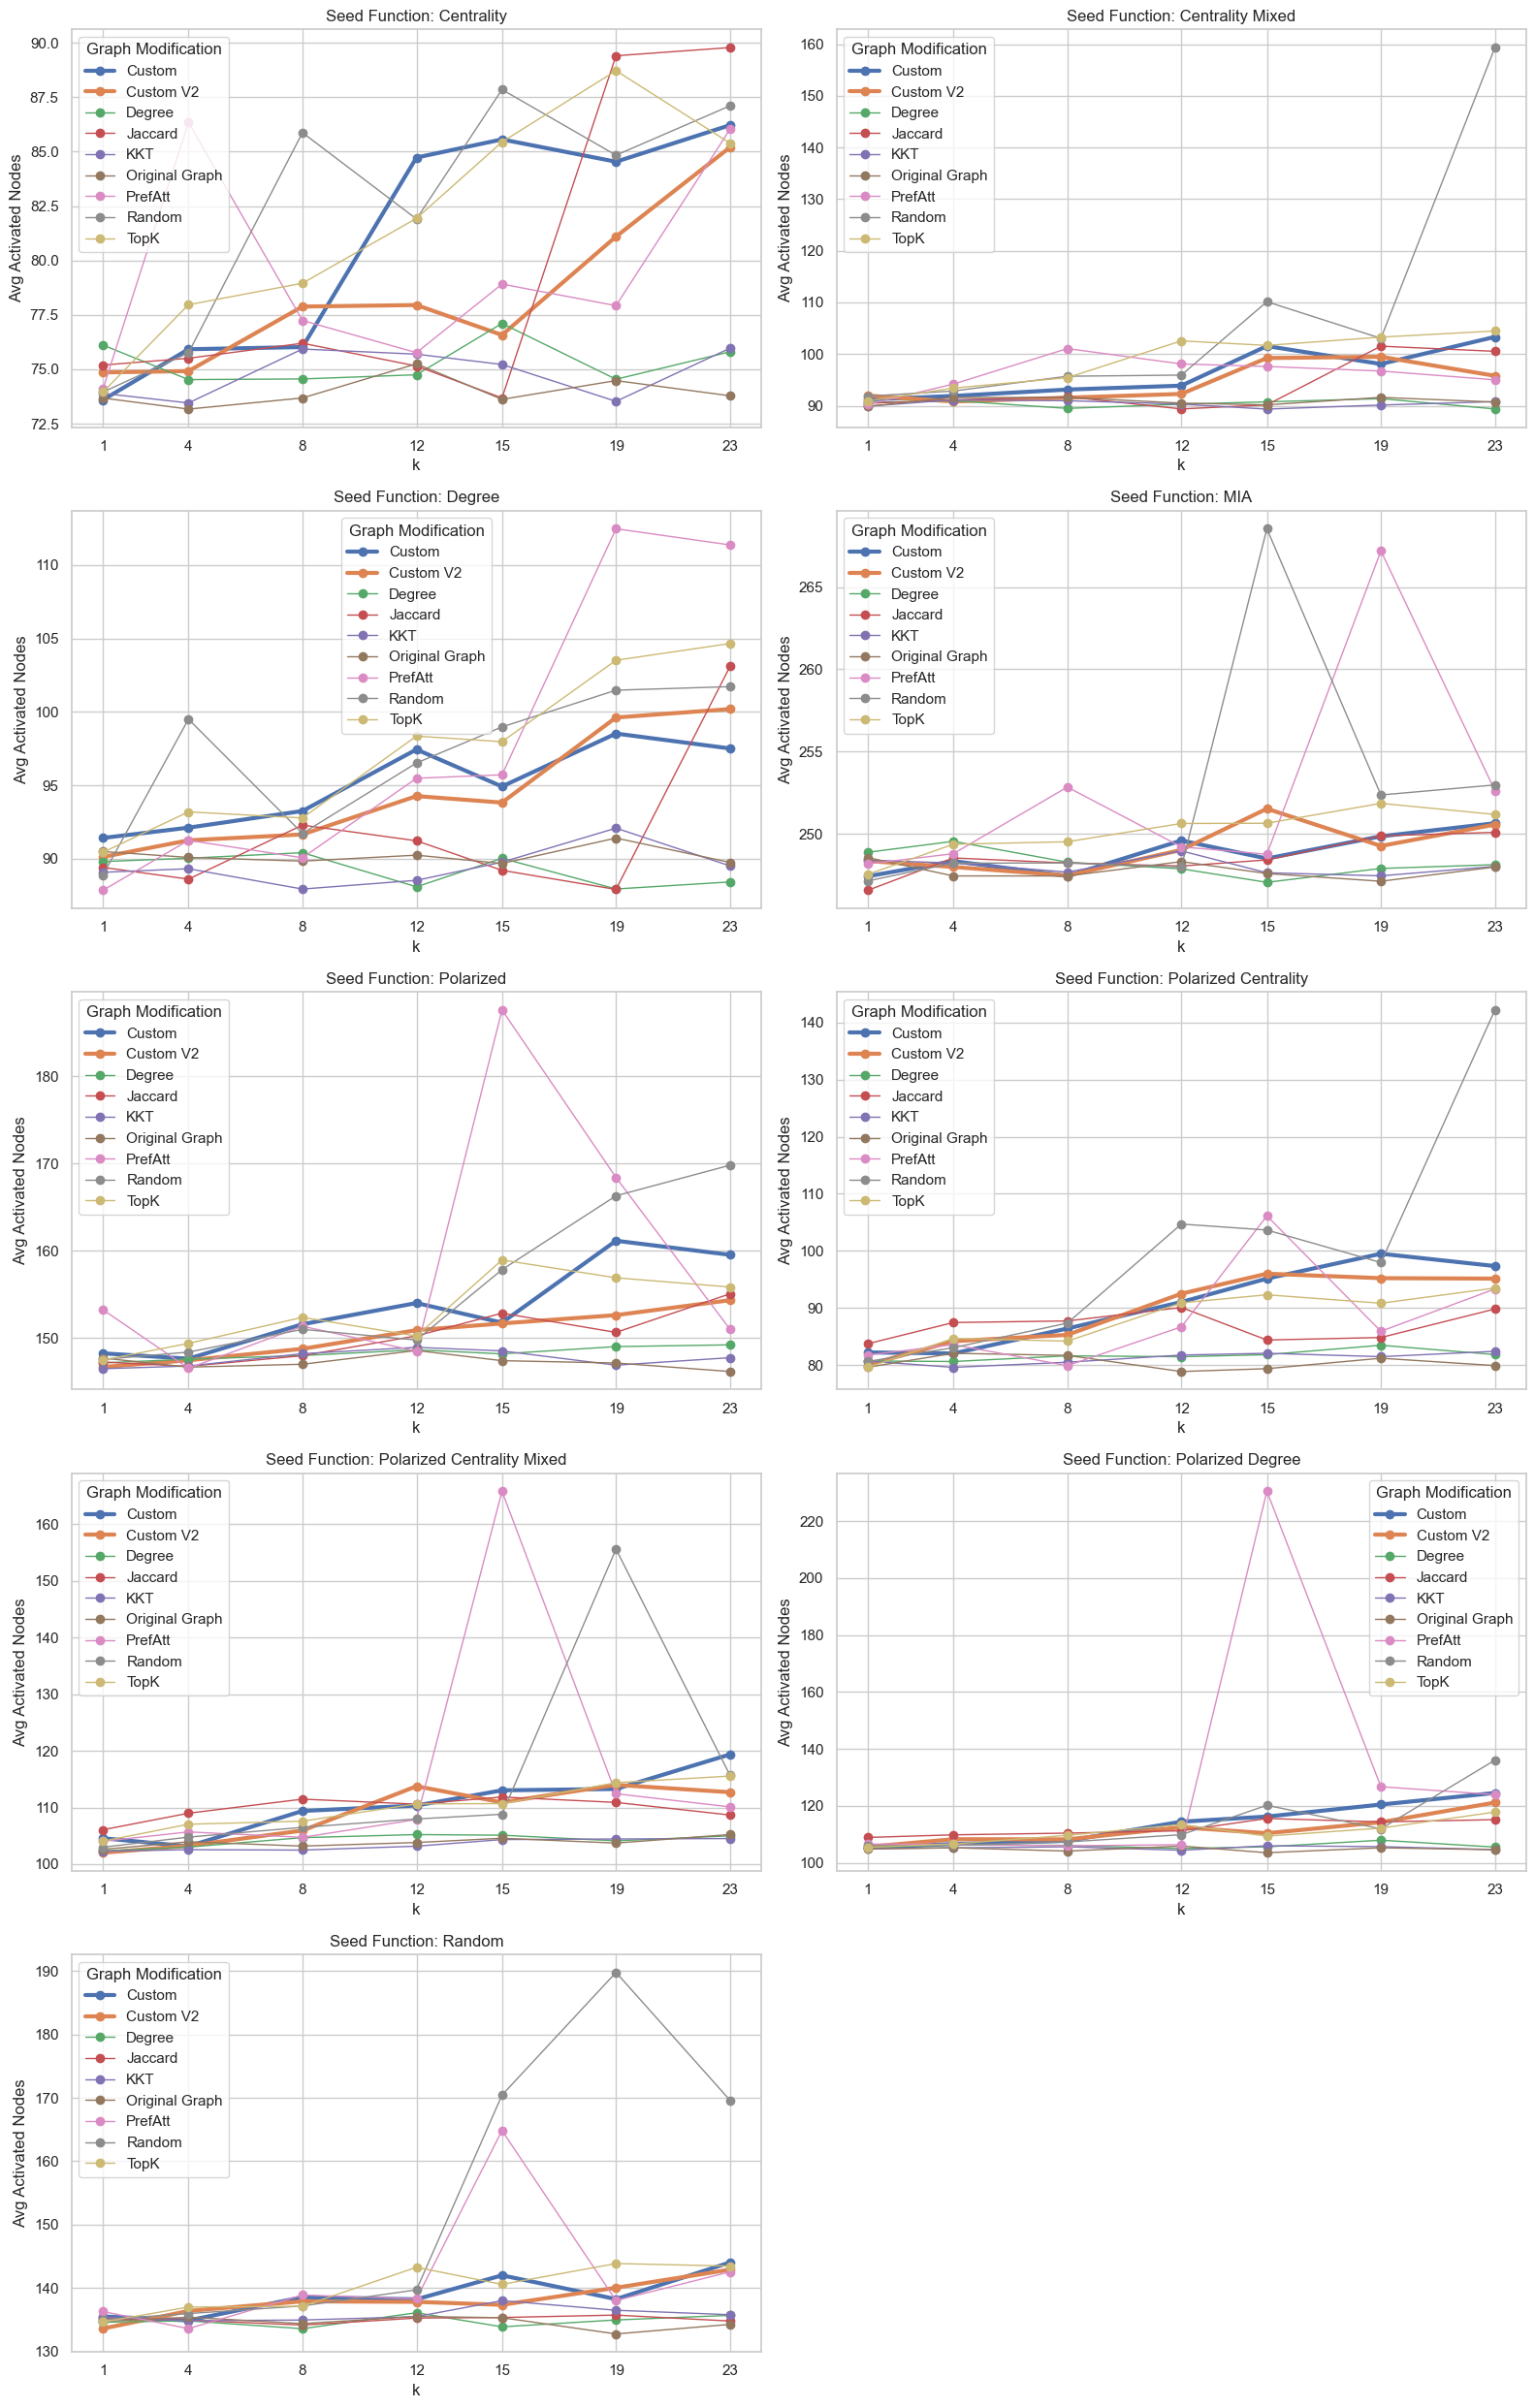

In [8]:
# Dictionary to store k values and corresponding dataframes
k_dict = {}

# Iterate over all the files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):  # assuming the files are in CSV format
        # Extract the k value from the filename (assuming k is before "_budget")
        try:
            k_value = filename.split("_k_")[0].split("_")[-1]
            k_value = int(k_value)
        except (IndexError, ValueError):
            print(f"Filename {filename} does not match the expected pattern.")
            continue
        
        # Read the CSV file into a DataFrame
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)
        
        # Store the DataFrame in the dictionary with k as the key
        k_dict[k_value] = df[["Seed Function", "Graph Modification", "Avg Activated Nodes"]]

# Assuming 'k_dict' is the dictionary with k values as keys and dataframes as values
dfs = []

# Iterate over the dictionary and add 'k' as a new column in each dataframe
for k, df in k_dict.items():
    df['k'] = k  # Add 'k' column to each dataframe
    dfs.append(df)  # Append the dataframe to the list

# Concatenate all the dataframes into one combined dataframe
if dfs:
    combined_df = pd.concat(dfs, ignore_index=True)
else:
    raise ValueError("No dataframes available to concatenate.")

# Now combined_df contains all the data from the different k values

# Ensure that seaborn style is applied for better visuals (optional)
sns.set(style="whitegrid")

# Get the unique seed functions
seed_functions = combined_df['Seed Function'].unique()

# Set up the number of rows and columns for the grid (e.g., 2 columns, adjust based on number of seed functions)
num_seed_functions = len(seed_functions)
cols = 2
rows = math.ceil(num_seed_functions / cols)

# Create subplots with a grid layout
fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 5))  # Adjust the size as needed

# Flatten axes array for easier indexing (in case of a 2D array)
axes = axes.flatten()

# Iterate over each seed function and create a plot in the grid
for i, seed_function in enumerate(seed_functions):
    # Filter the dataframe for the current seed function
    seed_df = combined_df[combined_df['Seed Function'] == seed_function]
    
    # Create a pivot table to have 'k' on the x-axis and 'Avg Activated Nodes' on the y-axis
    pivot_table = seed_df.pivot_table(index='k', columns='Graph Modification', values='Avg Activated Nodes')
    
    # Reindex the pivot table to ensure all k values from k_values are used (fill missing values with NaN)
    pivot_table = pivot_table.reindex(k_values)

    # Plot each line separately so we can adjust the linewidth for Custom and Custom V2
    ax = axes[i]
    for graph_modification in pivot_table.columns:
        if graph_modification in ["Custom", "Custom V2"]:
            pivot_table[graph_modification].plot(ax=ax, marker='o', linewidth=3, label=graph_modification)  # Thicker line
        else:
            pivot_table[graph_modification].plot(ax=ax, marker='o', linewidth=1, label=graph_modification)  # Default line width

    # Add title, labels, and legend
    ax.set_title(f"Seed Function: {seed_function}")
    ax.set_xlabel("k")
    ax.set_ylabel("Avg Activated Nodes")
    ax.set_xticks(k_values)
    ax.legend(title="Graph Modification")
    
# Hide any unused axes (if there are any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Removes the axis completely, leaving white space

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the grid of plots
plt.show()

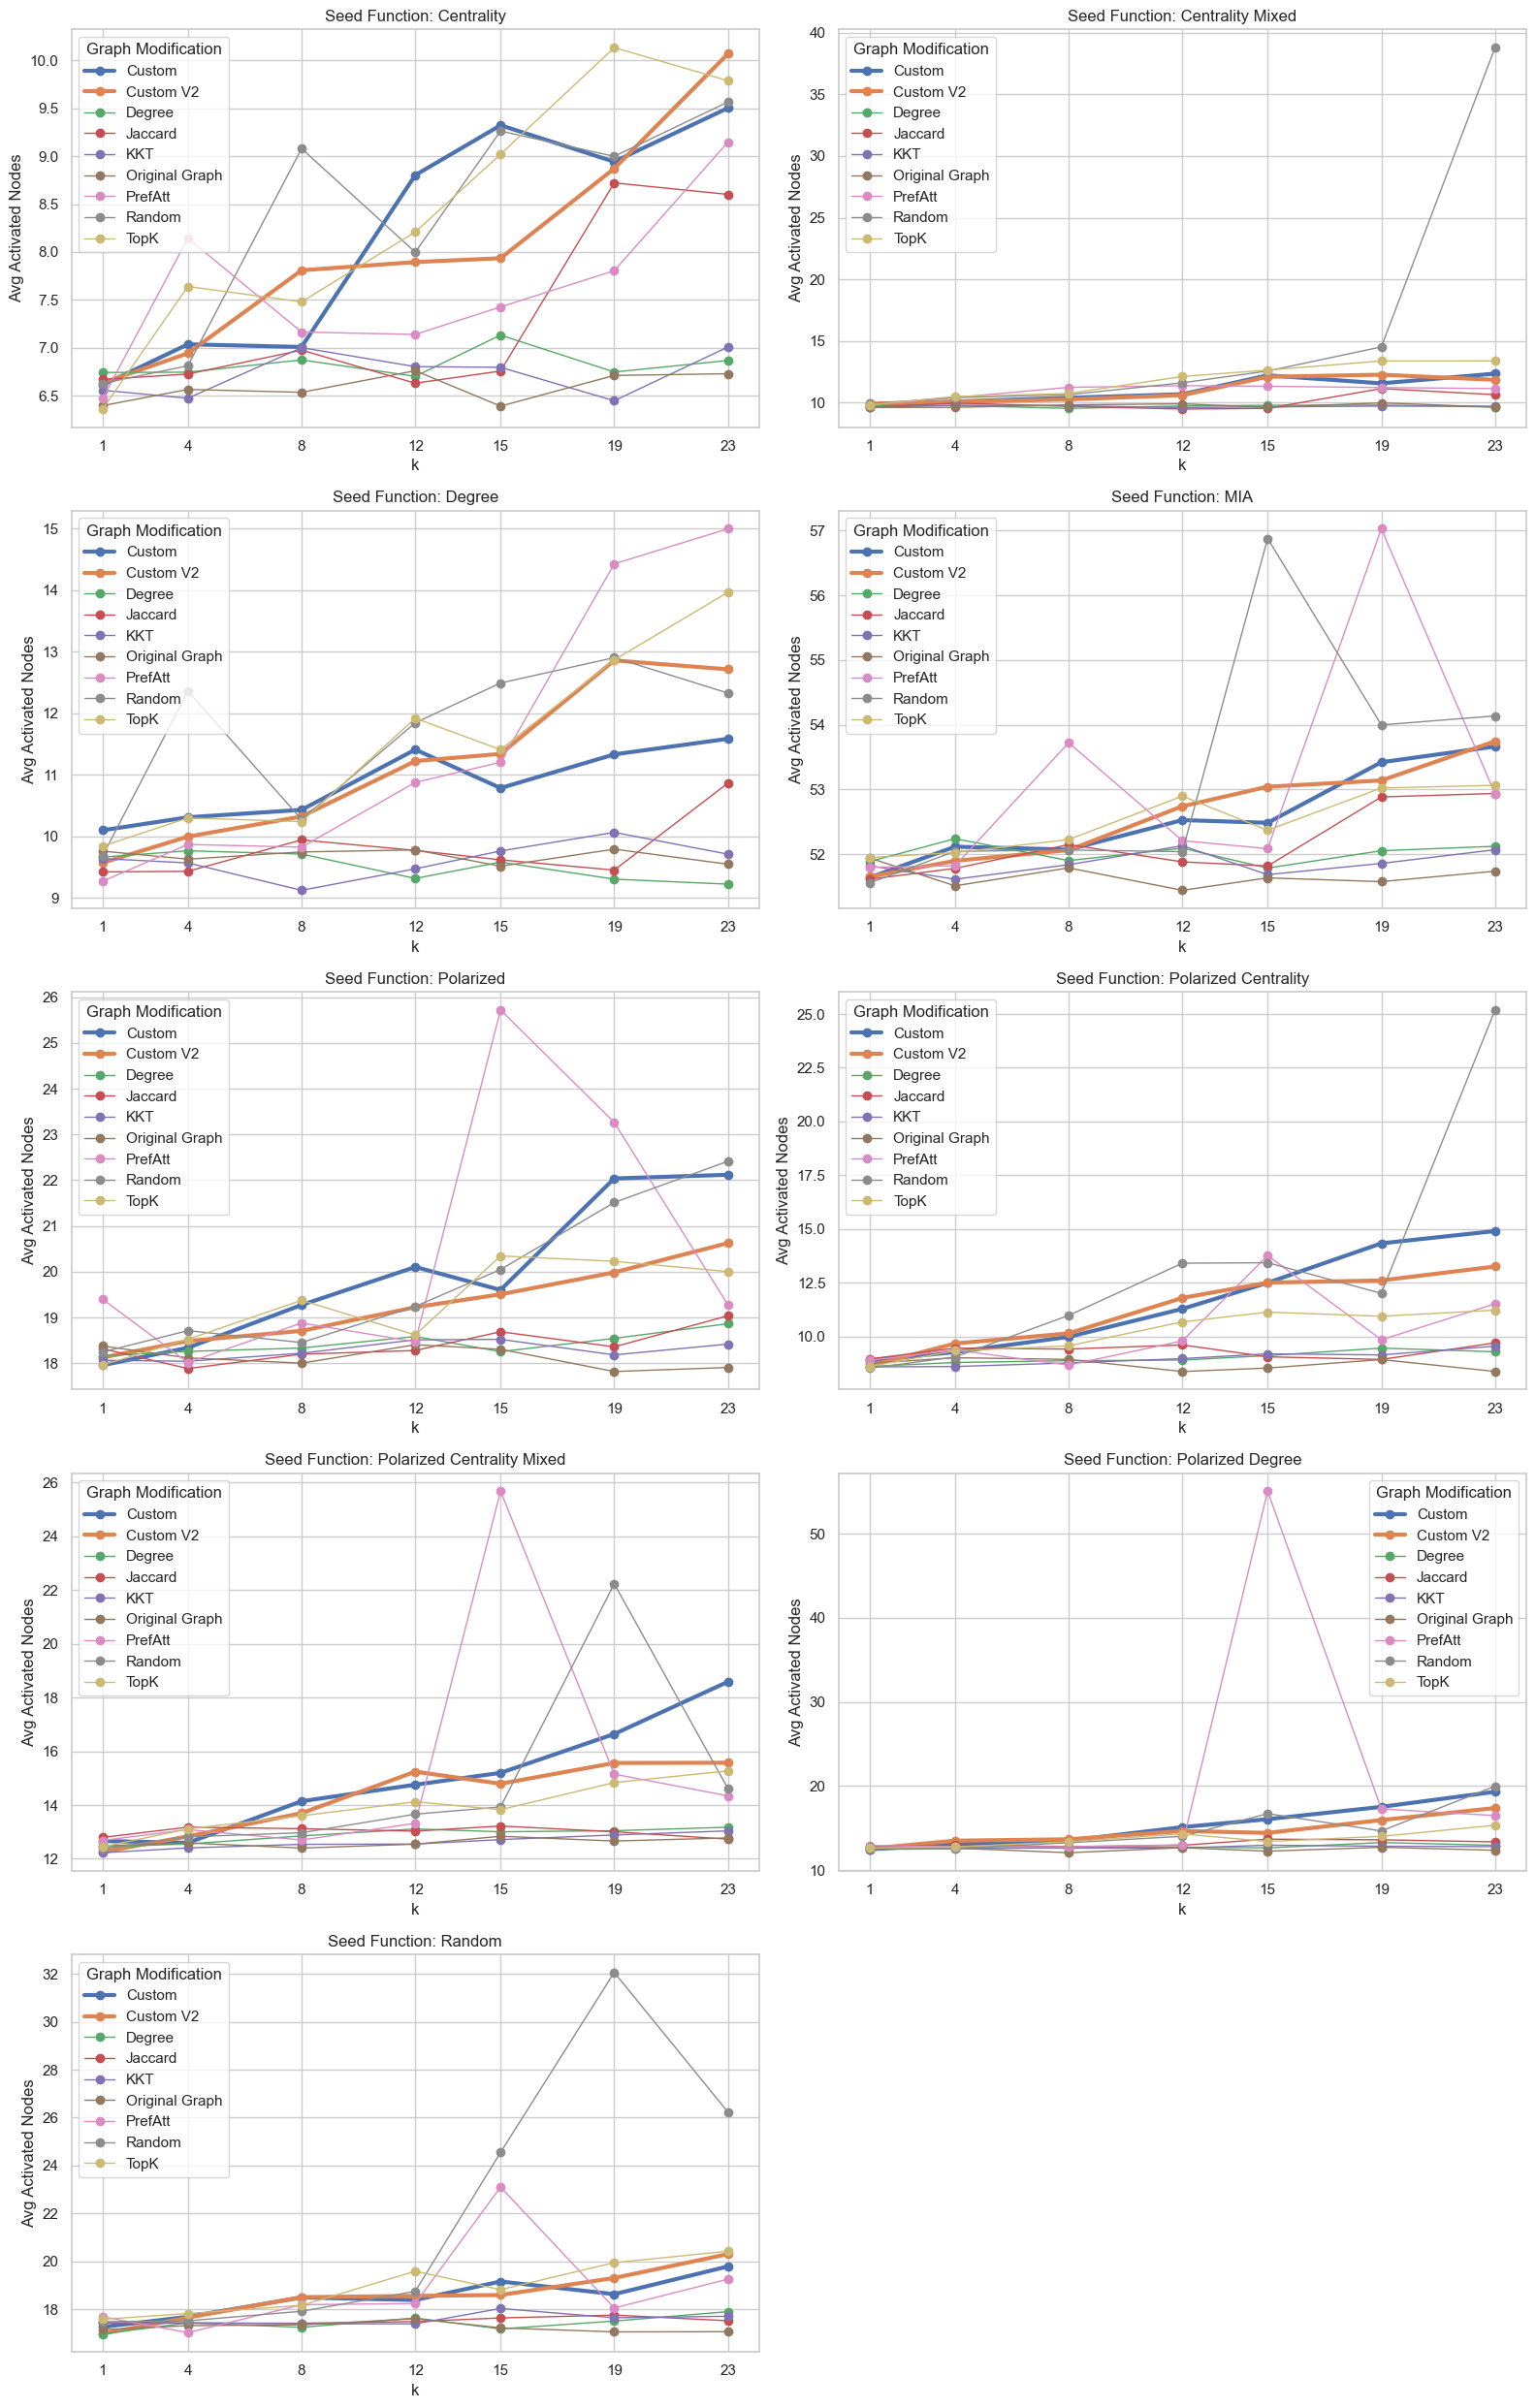

In [9]:
# Dictionary to store k values and corresponding dataframes
k_dict = {}

# Iterate over all the files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):  # assuming the files are in CSV format
        # Extract the k value from the filename (assuming k is before "_budget")
        try:
            k_value = filename.split("_k_")[0].split("_")[-1]
            k_value = int(k_value)
        except (IndexError, ValueError):
            print(f"Filename {filename} does not match the expected pattern.")
            continue
        
        # Read the CSV file into a DataFrame
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)
        
        # Store the DataFrame in the dictionary with k as the key
        k_dict[k_value] = df[["Seed Function", "Graph Modification", "Avg Color Activation Count"]]

# Assuming 'k_dict' is the dictionary with k values as keys and dataframes as values
dfs = []

# Iterate over the dictionary and add 'k' as a new column in each dataframe
for k, df in k_dict.items():
    df['k'] = k  # Add 'k' column to each dataframe
    dfs.append(df)  # Append the dataframe to the list

# Concatenate all the dataframes into one combined dataframe
if dfs:
    combined_df = pd.concat(dfs, ignore_index=True)
else:
    raise ValueError("No dataframes available to concatenate.")

# Now combined_df contains all the data from the different k values

# Ensure that seaborn style is applied for better visuals (optional)
sns.set(style="whitegrid")

# Get the unique seed functions
seed_functions = combined_df['Seed Function'].unique()

# Set up the number of rows and columns for the grid (e.g., 2 columns, adjust based on number of seed functions)
num_seed_functions = len(seed_functions)
cols = 2
rows = math.ceil(num_seed_functions / cols)

# Create subplots with a grid layout
fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 5))  # Adjust the size as needed

# Flatten axes array for easier indexing (in case of a 2D array)
axes = axes.flatten()

# Iterate over each seed function and create a plot in the grid
for i, seed_function in enumerate(seed_functions):
    # Filter the dataframe for the current seed function
    seed_df = combined_df[combined_df['Seed Function'] == seed_function]
    
    # Create a pivot table to have 'k' on the x-axis and 'Avg Activated Nodes' on the y-axis
    pivot_table = seed_df.pivot_table(index='k', columns='Graph Modification', values='Avg Color Activation Count')
    
    # Reindex the pivot table to ensure all k values from k_values are used (fill missing values with NaN)
    pivot_table = pivot_table.reindex(k_values)

    # Plot each line separately so we can adjust the linewidth for Custom and Custom V2
    ax = axes[i]
    for graph_modification in pivot_table.columns:
        if graph_modification in ["Custom", "Custom V2"]:
            pivot_table[graph_modification].plot(ax=ax, marker='o', linewidth=3, label=graph_modification)  # Thicker line
        else:
            pivot_table[graph_modification].plot(ax=ax, marker='o', linewidth=1, label=graph_modification)  # Default line width

    # Add title, labels, and legend
    ax.set_title(f"Seed Function: {seed_function}")
    ax.set_xlabel("k")
    ax.set_ylabel("Avg Activated Nodes")
    ax.set_xticks(k_values)
    ax.legend(title="Graph Modification")
    
# Hide any unused axes (if there are any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Removes the axis completely, leaving white space

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the grid of plots
plt.show()